----

# Descripción del proyecto

Has decidido abrir un pequeño café regentado por robots en Los Ángeles. El proyecto es prometedor pero caro, así que tú y tus compañeros decidís intentar atraer inversionistas. Están interesados en las condiciones actuales del mercado, ¿serás capaz de mantener tu éxito cuando la novedad de los camareros robot desaparezca?
Eres un gurú del análisis así que te han pedido que prepares un estudio de mercado. Tienes datos procedentes de fuentes abiertas sobre restaurantes en LA.

# Descripción de datos

Tabla `rest_data`:
* `object_name` — nombre del establecimiento
* `chain` — establecimiento que pertenece a una cadena (TRUE/FALSE)
* `object_type` — tipo de establecimiento
* `address` — dirección
* `number` — número de asientos

# Pasos a seguir

* Paso 1. Inicialización: Abrir y estudiar la informacion general
* Paso 2. Preparar los datos para el análisis
* Paso 3. Análisis de los datos
  * Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.
  * Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico.
  * ¿Qué tipo de establecimiento es habitualmente una cadena?
  * ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?
  * Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.
  * Coloca los datos de los nombres de las calles de la columna address en una columna separada.
  * Traza un gráfico de las diez mejores calles por número de restaurantes.
  * Encuentra el número de calles que solo tienen un restaurante.
  * Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?
* Paso 4. Conclusión
* Paso 5. Preparar una presentación

# Paso 1. Inicialización

Procederemos a importar los archivos y estudiar la información general de estos para saber como pre-procesarlos antes de proceder a analizarlos posteriormente.

In [1]:
! pip install -q usaddress

In [2]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import usaddress
import re
from scipy import stats
from math import ceil as math
from scipy import stats as st

In [3]:
#Cargamos los archivos de datos
try:
  df = pd.read_csv('/datasets/rest_data_us.csv')
except:
  df = pd.read_csv('/content/rest_data_us.csv')

In [4]:
# previsualizar los datos cargados
df.info()

# devolver las n filas superiores del dataframe
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
5,11791,THE SPOT GRILL,10004 NATIONAL BLVD,False,Restaurant,14
6,11792,CPK,100 WORLD WAY # 126,False,Restaurant,100
7,11793,PHO LALA,3500 W 6TH ST STE 226,False,Restaurant,7
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
9,11795,UPSTAIRS,3707 N CAHUENGA BLVD,False,Restaurant,35


* A primera vista podemos ver que nuestros datos parecen estar en buen estado.
* La columna `chain` parece tener algunos valores ausentes.
* Podriamos simplificar los nombres de las columnas `object_name` y `object_type`.
* Podríamos cambiar el tipo de datos de las columnas `chain` y `object_type` para optimizar el uso de memoria.

# Paso 2. Preparar los datos para el análisis

Ahora que ya conocermos nuestros datos, podemos proceder a corregir los detalles detectados.

In [5]:
# validando valores ausentes
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
chain,3,0.0
id,0,0.0
object_name,0,0.0
address,0,0.0
object_type,0,0.0
number,0,0.0


In [6]:
#validando las filas con valores ausentes en la columna "chain"
df[df['chain'].isnull()]

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [7]:
#validando duplicados
df.duplicated().sum()

0

In [8]:
df

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY # 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD # 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


In [9]:
#reemplazando los valores ausentes con el valor "false"
df['chain'].mode()
df['chain']= df['chain'].fillna(df['chain'].mode()[0])
#cambiando a nombres descriptivos
df.columns = ['id', 'name', 'address', 'chain', 'type', 'total_seats']
#cambiando tipos de datos
df['chain'] = df['chain'].astype('bool')
df['type'] = df['type'].astype('category')

In [10]:
df.loc[[7408,7523,8648]]

,id,name,address,chain,type,total_seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,False,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,False,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,False,Restaurant,35


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           9651 non-null   int64   
 1   name         9651 non-null   object  
 2   address      9651 non-null   object  
 3   chain        9651 non-null   bool    
 4   type         9651 non-null   category
 5   total_seats  9651 non-null   int64   
dtypes: bool(1), category(1), int64(2), object(2)
memory usage: 320.8+ KB


* Hemos reemplazado los valores ausentes en la columna `chain` con el valor "False".
* Hemos modificado los nombres de columnas por unos más descritivos manteniendo snake_case.
* Cambiamos los tipos de datos de la columna `chain` por bool y `type` por category para optimizar el uso de memoria.

# Paso 3. Análisis de los datos

Procedemos a usar nuestros datos limpios para resolver nuestras dudas:

##Investiga las proporciones de los distintos tipos de establecimientos.

         type  count
0  Restaurant   7255
1   Fast Food   1066
2        Cafe    435
3       Pizza    320
4         Bar    292
5      Bakery    283


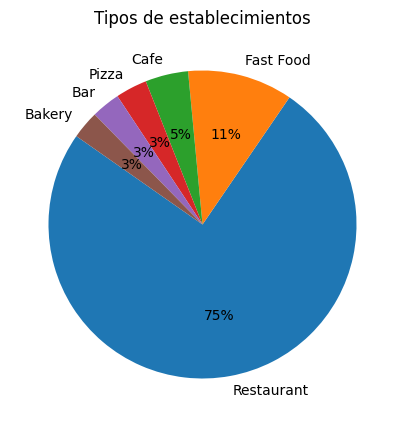

In [12]:
#generamos una tabla con un conteo por tipo de establecimiento
est_type = df['type'].value_counts().rename_axis('type').reset_index(name='count')
print(est_type)
# Generamos un grafico de pie con las proporciones
plt.figure(figsize=(10, 5))
plt.pie(est_type['count'], labels=est_type['type'],autopct='%0.f%%', startangle=145)
plt.title('Tipos de establecimientos')
plt.show()

Viendo el diagrama podemos decir con seguridad que los restaurantes es el tipo de establecimiento que predomina en LA con un 75%, seguido por establecimientos de comida rapida con un 11% y cafes con 5%.

## Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no.

   chain  count
0  False   5975
1   True   3676


Text(0.5, 1.0, 'Establecimientos que pertenecen vs que no pertenecen a una cadena ')

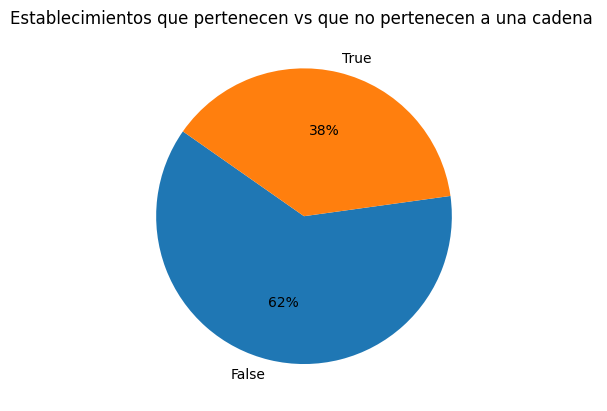

In [13]:
#generamos una tabla con un conteo de los establecimientos que pertenecen (o no) a una cadena
chainyn = df['chain'].value_counts().rename_axis('chain').reset_index(name='count')
print(chainyn)

# Generamos un grafico de pie con las proporciones
plt.pie(chainyn['count'], labels=chainyn['chain'],autopct='%0.f%%', startangle=145)
plt.title('Establecimientos que pertenecen vs que no pertenecen a una cadena ')

Según el diagrama anterior, el 62% de los establecimientos no pertenecen a una cadena, mientras que el 38% que resta son de cadena.

## ¿Qué tipo de establecimiento es habitualmente una cadena?

   chain        type  count  total       ratio
2   True      Bakery    283    283  100.000000
3   True        Cafe    266    435   61.149425
1   True   Fast Food    605   1066   56.754221
4   True       Pizza    153    320   47.812500
0   True  Restaurant   2292   7255   31.592006
5   True         Bar     77    292   26.369863


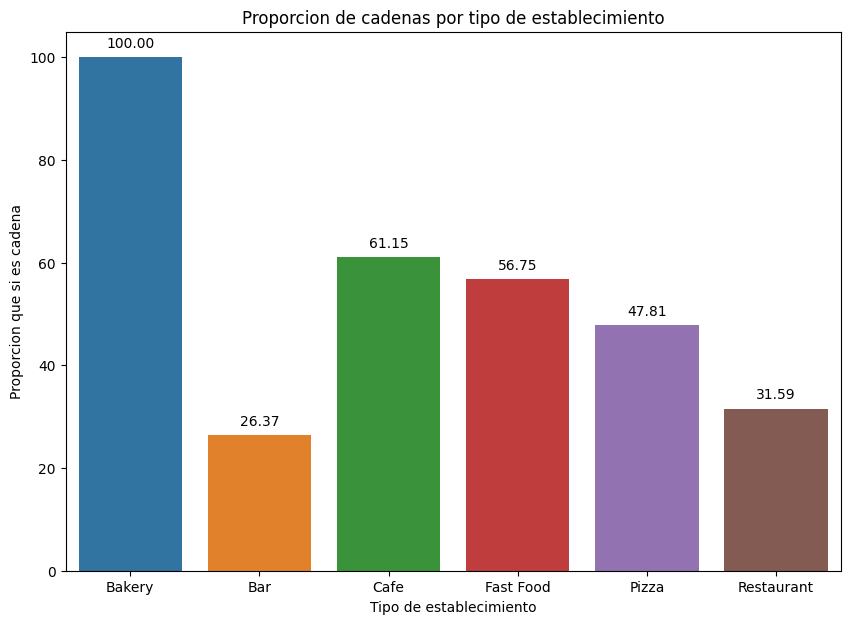

In [14]:
# separamos la información de los establecimientos que son cadenas.
chain_type = df[df['chain'] == True]

# Contamos la cantidad de tipos de establecimientos.
chain_type = pd.pivot_table(chain_type,index=['chain','type'], values=['id'], aggfunc='count').reset_index()
chain_type.columns = ['chain', 'type', 'count']
chain_type = chain_type.sort_values(by='count', ascending=False)

#estraemos el total de establecimientos
totalData = df['type'].value_counts().rename_axis('type').reset_index(name='total')

#combinamos los datos
chain_type = pd.merge(chain_type, totalData, how='inner', on='type')
chain_type['ratio'] = chain_type['count'] / chain_type['total'] * 100
print(chain_type.sort_values('ratio', ascending=False))

#graficamos
plt.figure(figsize=(10, 7))

ax = sns.barplot(data = chain_type,
                 x='type',
                 y='ratio')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Proporcion que si es cadena')
plt.title('Proporcion de cadenas por tipo de establecimiento')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.show()

Basado en el grafico anterior, podemos decir que todas las panaderías son parte de una cadena. En el caso de cafes y establecimientos de comida rapida, más de la mitad son cadenas.
En el caso de establecimientos de pizza, restaurantes y bares predomina no ser cadenas.

## ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

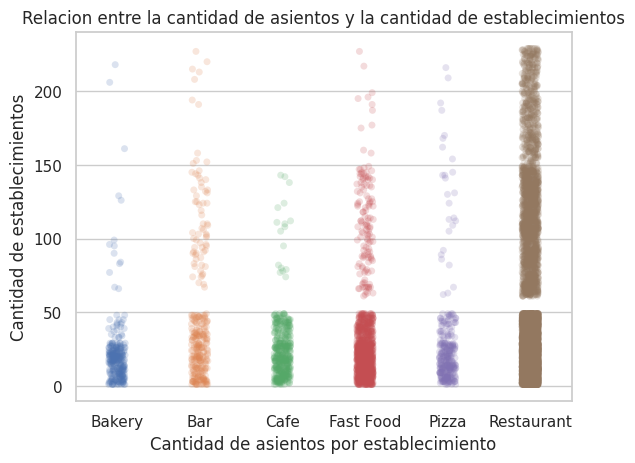

In [15]:
#graficamos con stripplot
sns.set(style = 'whitegrid')

stripplot = sns.stripplot(x="type", y="total_seats", data=df, hue = "type", legend=False,alpha=.2)
stripplot.axes.set_title("Relacion entre la cantidad de asientos y la cantidad de establecimientos")
stripplot.set_xlabel("Cantidad de asientos por establecimiento")
stripplot.set_ylabel("Cantidad de establecimientos")
plt.show()

* Basados en el grafico de dispersión por establecimiento, podemos decir que es muy comun tener hasta 50 asientos para todos los tipos de establecimientos y es menos común ver que tengan sobre 150.
* Para el caso de los restaurantes hay una densidad mayor de establecimientos, pero sigue la misma logica, la mayor concentración está bajo los 50 y la menor por sobre los 150.

## Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos?

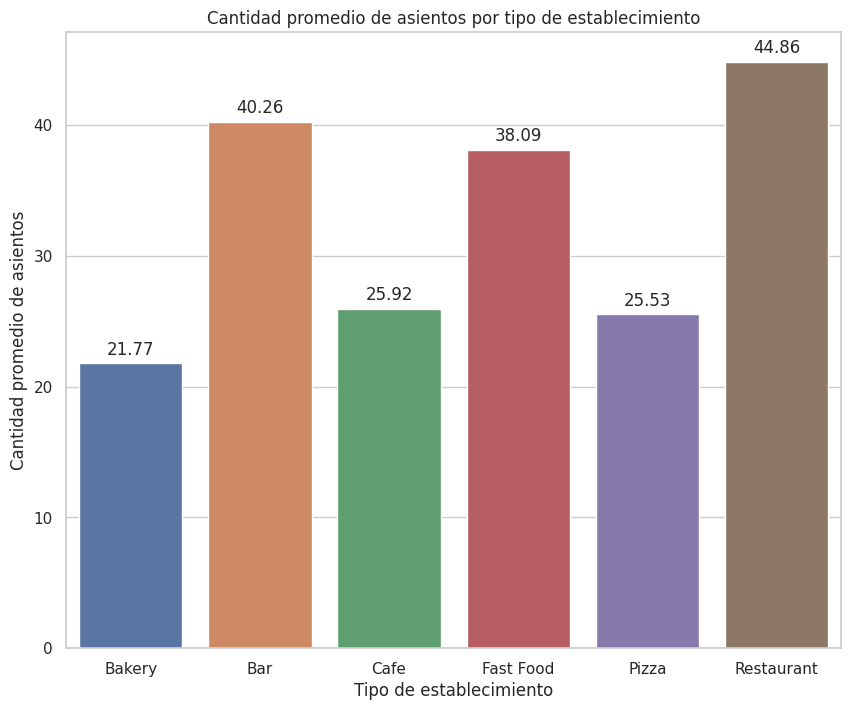

In [16]:
#Separamos los datos de solo cadenas
chain_data = df[df['chain'] == True]
#calculamos los asientos promedio de cada tipo de establecimiento
avg_chaindata = chain_data.groupby('type').agg({'total_seats':['mean']}).reset_index()
avg_chaindata.columns = ['Chain_type','avg_seats']
avg_chaindata= avg_chaindata.sort_values('avg_seats', ascending=False)

#grafico de barras
plt.figure(figsize=(10, 8))
ax = sns.barplot(data = avg_chaindata,
                 x='Chain_type',
                 y='avg_seats')
plt.xlabel('Tipo de establecimiento')
plt.ylabel('Cantidad promedio de asientos')
plt.title('Cantidad promedio de asientos por tipo de establecimiento')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
plt.show()

En promedio, el tipo de establecimiento con mayor cantidad de asientos son los restaurantes (casi 45 asientos). Las panaderias y pizzerias son las que tienden a tener menos asientos promedio, seguramente porque la comida se suele comprar para llevar y no se requiere una cantidad de asientos muy grande.

## Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [17]:
#funcion para limpiar direcciones
def cleanAddress(address):
    #casos especiales
    if address.startswith('OLVERA'):
        address = 'OLVERA, LA, USA'
    elif address.startswith('1033 1/2 LOS ANGELES ST'):
        address = '1033 1/2 LOS ANGELES ST, LA, USA'

    #casos normales
    else:
        raw = usaddress.parse(address)
        addressDict = {}
        for i in raw:
            addressDict.update({i[1]:i[0]})

        if 'StreetNamePostType' in addressDict:
            address = addressDict['AddressNumber'] + " " + str(addressDict['StreetName']) + " " + str(addressDict['StreetNamePostType']) + str(', LA, USA')
        else:
            address = addressDict['AddressNumber'] + " " + str(addressDict['StreetName']) + " " + str(', LA, USA')

    return address

# funcion para obtener solo el nombre de la calle
def streetNames(street):
    street = street.split(',')[0].split(' ')[-2:]
    street = " ".join(street)
    if street == '103 ':
        street = '103RD ST'
    return street

In [18]:
#limpiamos nuestra columna address
df['address'] = df['address'].apply(cleanAddress)

#obtenemos solo el nombre de la calle
df['street_name'] = df['address'].apply(streetNames)

df

,id,name,address,chain,type,total_seats,street_name
0,11786,HABITAT COFFEE SHOP,"3708 ROCK BLVD, LA, USA",False,Cafe,26,ROCK BLVD
1,11787,REILLY'S,"100 WORLD WAY, LA, USA",False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,"6801 HOLLYWOOD BLVD, LA, USA",False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,"1814 SUNSET BLVD, LA, USA",False,Restaurant,22,SUNSET BLVD
4,11790,POLLEN,"2100 PARK AVE, LA, USA",False,Restaurant,20,PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,"217 TEMPLE AVE, LA, USA",False,Restaurant,122,TEMPLE AVE
9647,21433,FIN-MELROSE,"5750 MELROSE AVE, LA, USA",False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,"6741 HOLLYWOOD BLVD, LA, USA",True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,"548 SPRING ST, LA, USA",False,Cafe,6,SPRING ST


## Traza un gráfico de las diez mejores calles por número de restaurantes.

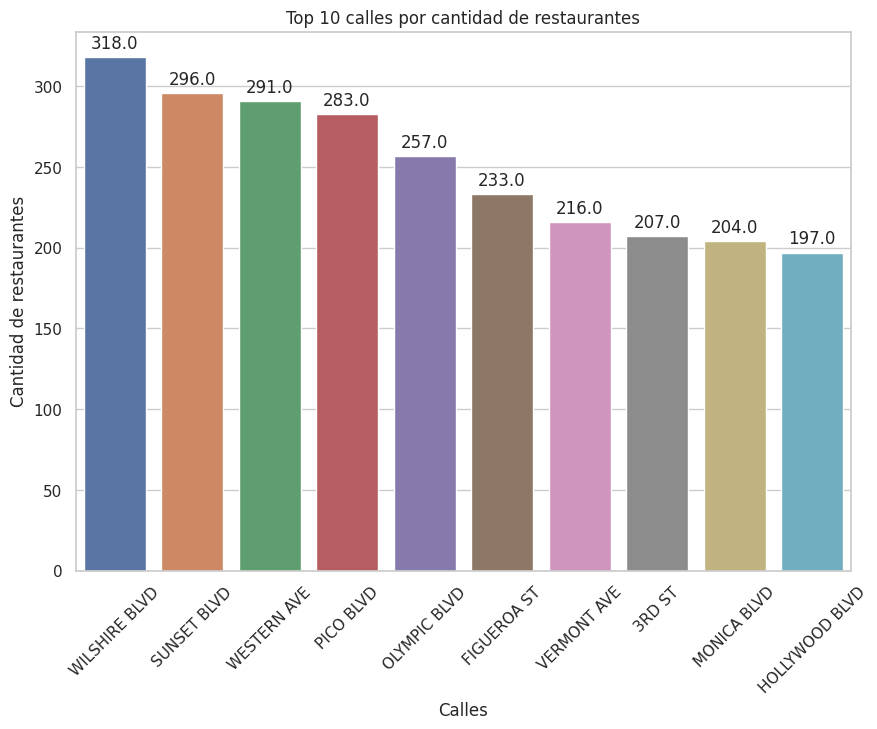

In [19]:
#separamos los datos de solo restaurantes
rest_data = df[df['type'] == "Restaurant"]
rest_data = pd.pivot_table(rest_data, index=['street_name'], values=['id'], aggfunc=['count']).reset_index()
rest_data.columns = ['street_name','count']
#ordenamos lo datos por cantidad de restaurantes y mostramos los 10 primeros
top10_rest = rest_data.sort_values(by='count', ascending=False).head(10)

# Grafico de barras
plt.figure(figsize=(10, 7))
ax = sns.barplot(data = top10_rest.sort_values('count', ascending=False),
                 x='street_name',
                 y='count')
plt.xlabel('Calles')
plt.ylabel('Cantidad de restaurantes')
plt.title('Top 10 calles por cantidad de restaurantes')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

Las calles con la mayor cantidad de restaurantes son Wilshire Blvd, Sunset Blvd, Western Ave, Pico Blvd, Olympic Blvd, Figueroa ST, Vermon Ave, 3rd ST, Monica Blvd y Hollywood Blvd en orden de mayor a menor.

## Encuentra el número de calles que solo tienen un restaurante.

In [20]:
#Extraemos las calles que solo tienen un restaurante
streets_with_one_rest = rest_data.query('count == 1').reset_index(drop=True)
print('La cantidad de calles con solo un establecimiento es: {}'.format(len(streets_with_one_rest)))

La cantidad de calles con solo un establecimiento es: 227


## Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

Text(0, 0.5, 'Densidad')

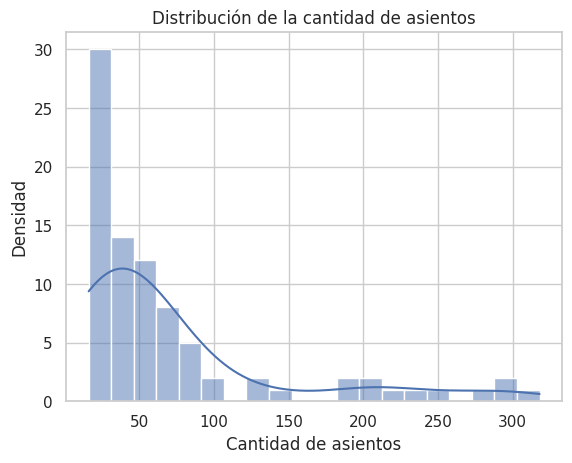

In [21]:
#calculamos la cantidad promedio de restaurantes por calle
avg_rest = rest_data['count'].mean().round()
#extraemos solo las calles que superen el promedio
ab_avg = rest_data[rest_data['count'] > avg_rest]

#graficamos la distribucion de asientos
ax = sns.histplot(ab_avg['count'],kde=True, bins= 20)
ax.set_title('Distribución de la cantidad de asientos')
ax.set_xlabel('Cantidad de asientos')
ax.set_ylabel('Densidad')

La mayoria de las calles con muchos restaurantes tienen entre 20 y 50 asientos, probablemente porque al ser calles con mucha competencia no es conveniente tener muchos asientos.

# Paso 4. Conclusión

Los datos presentados en este análisis apuntan a que la idea de abrir un café regentado por robots en Los Ángeles es viable. Actualmente, el mercado de cafés representa un 5% del total de establecimientos de alimentos en LA. Aunque no es una proporción muy alta, sugiere que hay un mercado para este tipo de establecimientos. Además, observamos que más de la mitad de los cafés en LA pertenecen a cadenas, lo que indica la posibilidad de expansión si el negocio inicial es exitoso.

De igual manera, es importante tener en cuenta que el promedio de asientos en los cafés tiende a ser relativamente bajo (menos de 50), lo cual es compatible con el modelo de café que estamos planeando, dado que la eficiencia de los robots puede permitir un servicio rápido y la rotación de clientes.

Una posible dificultad es la competencia con otros establecimientos, especialmente en calles con un alto número de restaurantes. Sin embargo, el café operado por robots tiene un factor de novedad que podría atraer a los clientes en estos lugares de alta competencia. Sería crucial mantener la calidad del servicio y la comida para retener a los clientes una vez que la novedad inicial de los camareros robots haya desaparecido.

Por último, también hay una oportunidad significativa en las 227 calles que solo tienen un restaurante, ya que puede haber menos competencia en estos lugares y la singularidad del café puede atraer a una gran cantidad de clientes.

En resumen, basándonos en los datos, abrir un café regentado por robots en Los Ángeles parece ser una empresa viable con un buen potencial de éxito. Sin embargo, será esencial elegir la ubicación adecuada y mantener la calidad del servicio y la comida para asegurar el éxito a largo plazo.

# Paso 5. Presentación

https://docs.google.com/presentation/d/1-c2TQkA5UCwqd4Gp1K0ZNot2DQpLtLpVgEYdaosP2rg/edit?usp=sharing